<a href="https://colab.research.google.com/github/pyjanvi/Clustering-customer-review-for-market-Research/blob/main/Clustering_customer_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from sklearn.metrics import silhouette_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
%pip install nltk

In [1]:
import pandas as pd
customer_data = pd.read_csv('amazon.csv')
customer_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",90%,3.9,"7,928",ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,â‚¹379,â‚¹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"â‚¹2,280","â‚¹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everythi

In [ ]:
customer_data.shape
customer_data.columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [2]:
#drop columns
customer_data = customer_data.drop(['discounted_price','product_id','actual_price','discount_percentage','user_id','rating_count','product_link','img_link','review_title'],axis= 1, errors='ignore')
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",I have installed this in my kitchen working fi...


In [ ]:
customer_data.isnull().sum()


,0
product_name,0
category,0
rating,0
about_product,0
review_id,0
review_content,0


In [3]:
# convert text to lowercase
customer_data['review_content'] = customer_data['review_content'].str.lower()
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging is fine toono complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",i ordered this cable to connect my phone to an...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","good product,long wire,charges good,nice,i bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","i received product without spanner,excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",i have installed this in my kitchen working fi...


In [ ]:
import re
customer_data['review_content']=customer_data['review_content'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
customer_data

,product_name,category,rating,about_product,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging is fine toono complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",i ordered this cable to connect my phone to an...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",not quite durable and sturdyhttpsmmediaamazonc...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought this instead of original apple does the...
...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",i received product without spannerexcellent pr...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything as mentioned but the measurin...
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic but cool body u have to find sturdy su...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",i have installed this in my kitchen working fi...


In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

customer_data['review_content'] = customer_data['review_content'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)
customer_data

,product_name,category,rating,about_product,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging fine toono complainscha...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work rs fast app...
...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

customer_data['review_content'] = customer_data['review_content'].apply(
    lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split())
)
customer_data

,product_name,category,rating,about_product,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...
...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(customer_data['review_content'])
X.shape

(1465, 5000)

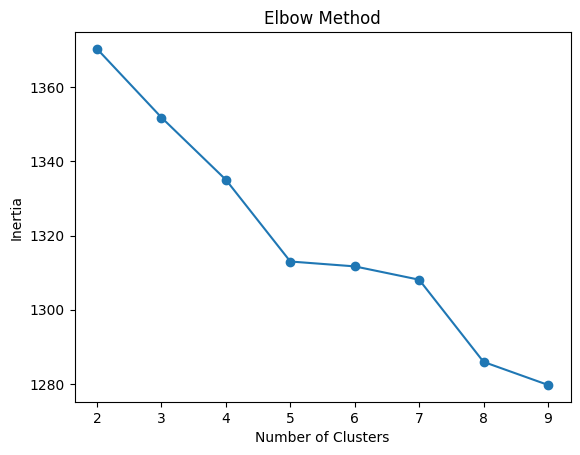

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Elbow method
inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=6, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(X)
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging is fine toono complains...,2
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",i ordered this cable to connect my phone to an...,2
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","not quite durable and sturdy,https://m.media-a...",0
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","good product,long wire,charges good,nice,i bou...",4
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","bought this instead of original apple, does th...",2
...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","i received product without spanner,excellent p...",4
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri...",4
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s...",4
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",i have installed this in my kitchen working fi...,0


In [25]:
customer_data.groupby('cluster')['review_content'].head(5)

,review_content
0,looks durable charging is fine toono complains...
1,i ordered this cable to connect my phone to an...
2,"not quite durable and sturdy,https://m.media-a..."
3,"good product,long wire,charges good,nice,i bou..."
4,"bought this instead of original apple, does th..."
5,"it's a good product.,like,very good item stron..."
6,build quality is good and it is comes with 2 y...
7,worth for money - suitable for android auto......
8,i use this to connect an old pc to internet. i...
9,i ordered this cable to connect my phone to an...


In [ ]:
import numpy as np

terms = tfidf.get_feature_names_out()

for i in range(6):
    print(f"\nCluster {i}:")
    centroid = kmeans.cluster_centers_[i]
    top_terms = centroid.argsort()[-10:]
    print([terms[j] for j in top_terms])


Cluster 0:
['parker', 'glass', 'product', 'print', 'good', 'printer', 'cover', 'screen', 'ink', 'pen']

Cluster 1:
['work', 'one', 'like', 'nice', 'price', 'quality', 'use', 'easy', 'good', 'product']

Cluster 2:
['iphone', 'work', 'usb', 'quality', 'original', 'product', 'fast', 'good', 'charging', 'cable']

Cluster 3:
['wifi', 'using', 'product', 'gaming', 'laptop', 'use', 'key', 'good', 'keyboard', 'mouse']

Cluster 4:
['smart', 'price', 'service', 'installation', 'sound', 'good', 'quality', 'picture', 'remote', 'tv']

Cluster 5:
['day', 'ui', 'call', 'calling', 'smartwatch', 'face', 'battery', 'good', 'feature', 'watch']


In [ ]:
customer_data.groupby('cluster').size()

,0
cluster,
0,97
1,469
2,143
3,375
4,129
5,252


In [ ]:
cluster_names = {
    0: "Smartwatch & Features",
    1: "General Product Satisfaction",
    2: "Phone Performance & Charging",
    3: "Home Appliances & Heating",
    4: "Cable / Charger Quality",
    5: "Audio & Value for Money"
}

customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)
customer_data

,product_name,category,rating,about_product,review_id,review_content,cluster,cluster_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2,Phone Performance & Charging
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4,Cable / Charger Quality
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3,Home Appliances & Heating
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2,Phone Performance & Charging
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4,Cable / Charger Quality
...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1,General Product Satisfaction
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3,Home Appliances & Heating
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3,Home Appliances & Heating
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3,Home Appliances & Heating


In [ ]:
customer_data['cluster'].value_counts()

,count
cluster,
1,469
3,375
5,252
2,143
4,129
0,97


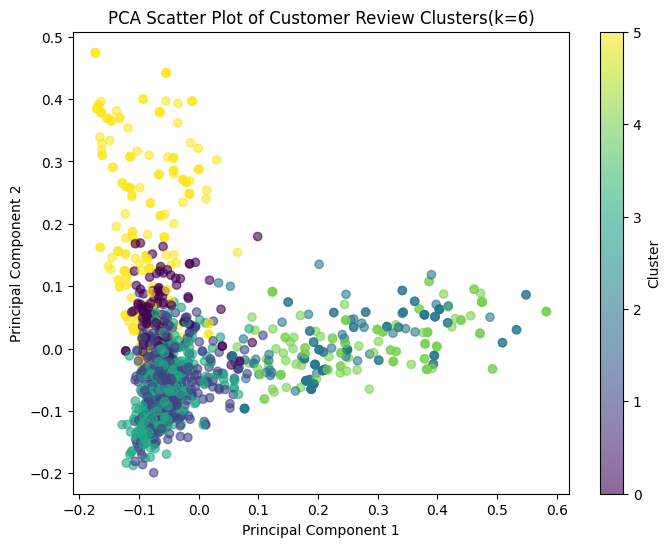

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=customer_data['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot of Customer Review Clusters(k=6)")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [42]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, davies_bouldin_score

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=10,
    ngram_range=(1,2),   # BIG improvement for KMeans
    norm='l2'
)
X = vectorizer.fit_transform(customer_data['review_content'].astype(str))

In [45]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=20
)
kmeans_labels = kmeans.fit_predict(X)

In [46]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(
    n_clusters=6,
    linkage='average',
    metric='cosine'
)
hier_labels = hier.fit_predict(X.toarray())

In [48]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=6,random_state=42,
    covariance_type='diag'
)
gmm_labels = gmm.fit_predict(X.toarray())

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np

def evaluate_algo(name, X, labels):
    if len(set(labels)) <= 1 or -1 in labels:
        return None
    sil = silhouette_score(X, labels, metric='cosine')
    db  = davies_bouldin_score(X.toarray(), labels)

    return [name, sil, db]

In [50]:
results = []

results.append(evaluate_algo("K-Means (k=6)", X, kmeans_labels))
results.append(evaluate_algo("Hierarchical", X, hier_labels))
results.append(evaluate_algo("GMM", X, gmm_labels))

comparison_df = pd.DataFrame(
    results,
    columns=["Algorithm", "Silhouette Score", "Davies-Bouldin Index"]
)
comparison_df

,Algorithm,Silhouette Score,Davies-Bouldin Index
0,K-Means (k=6),0.051236,4.893469
1,Hierarchical,0.017756,1.835446
2,GMM,0.041716,5.954368


In [52]:
print("Best Algorithm:", comparison_df.iloc[0]["Algorithm"])
print("Weakest Algorithm:", comparison_df.loc[
    comparison_df["Silhouette Score"].idxmin(), "Algorithm"
])

Best Algorithm: K-Means (k=6)
Weakest Algorithm: Hierarchical


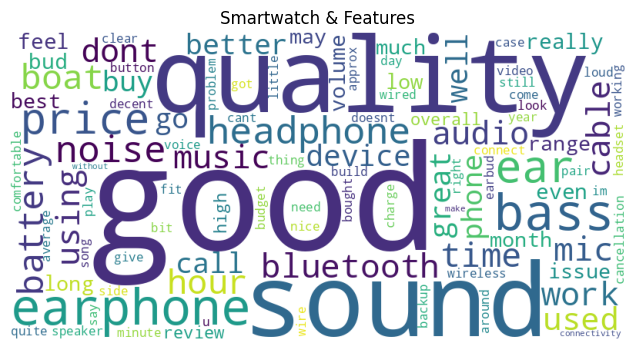

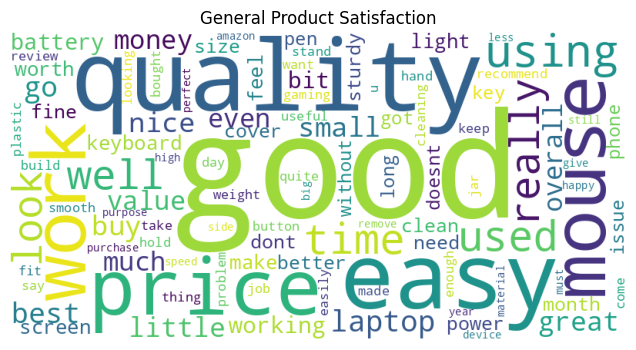

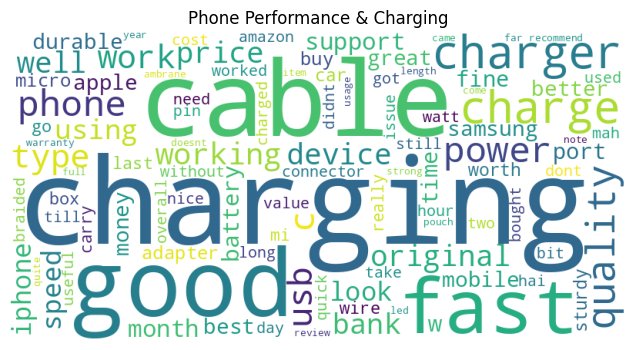

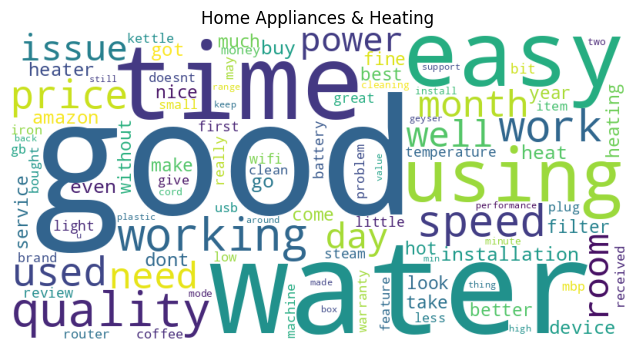

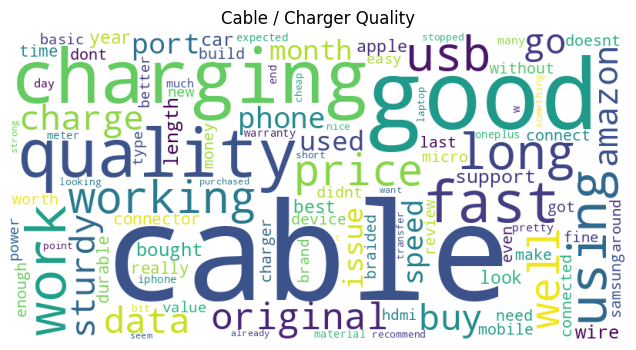

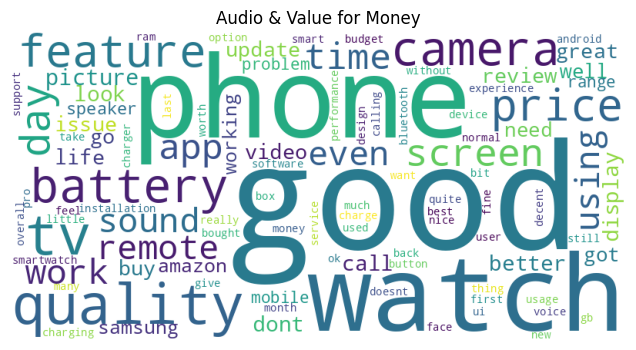

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['aa', 'one', 'use', 'product'])  # optional domain words

for i in sorted(customer_data['cluster'].unique()):
    text = " ".join(customer_data[customer_data['cluster'] == i]['review_content'])

    wc = WordCloud(
        background_color='white',
        stopwords=custom_stopwords,
        max_words=100,
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(customer_data[customer_data['cluster'] == i]['cluster_name'].iloc[0])
    plt.show()

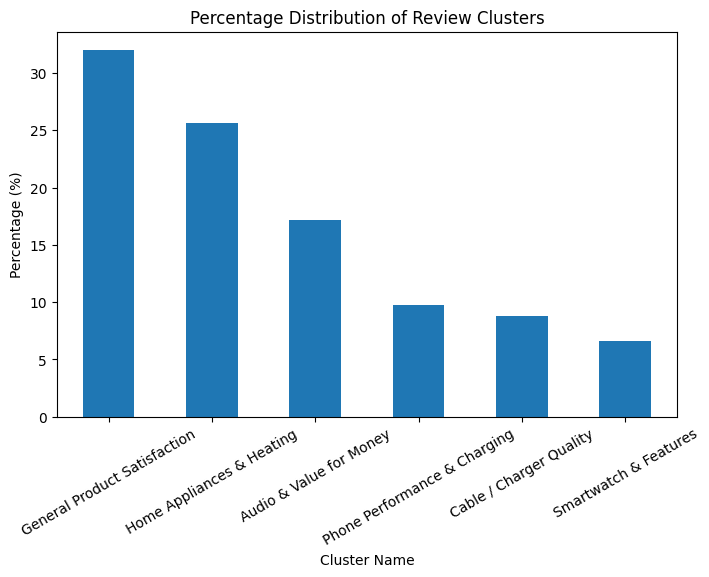

In [ ]:
cluster_percent = customer_data['cluster_name'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
cluster_percent.plot(kind='bar')

plt.title("Percentage Distribution of Review Clusters")
plt.xlabel("Cluster Name")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)

plt.show()

In [ ]:
customer_data['rating'].dtype

dtype('O')

In [ ]:
customer_data['rating'] = pd.to_numeric(customer_data['rating'], errors='coerce')
customer_data['rating'].dtype

dtype('float64')

In [ ]:
customer_data=customer_data.dropna(subset=['rating'])
customer_data

,product_name,category,rating,about_product,review_id,review_content,cluster,cluster_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2,Phone Performance & Charging
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4,Cable / Charger Quality
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3,Home Appliances & Heating
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2,Phone Performance & Charging
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4,Cable / Charger Quality
...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1,General Product Satisfaction
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3,Home Appliances & Heating
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3,Home Appliances & Heating
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3,Home Appliances & Heating


<Figure size 1200x600 with 0 Axes>

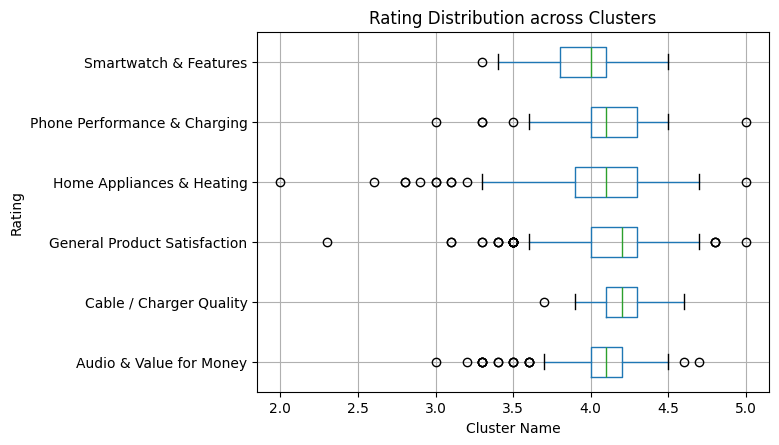

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
customer_data.boxplot(column='rating', by='cluster_name', vert=False)

plt.title("Rating Distribution across Clusters")
plt.suptitle("")
plt.xlabel("Cluster Name")
plt.ylabel("Rating")

plt.show()

In [ ]:
customer_data.to_csv("customer_review_clusters.csv", index=False)